1)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
diabetes=pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

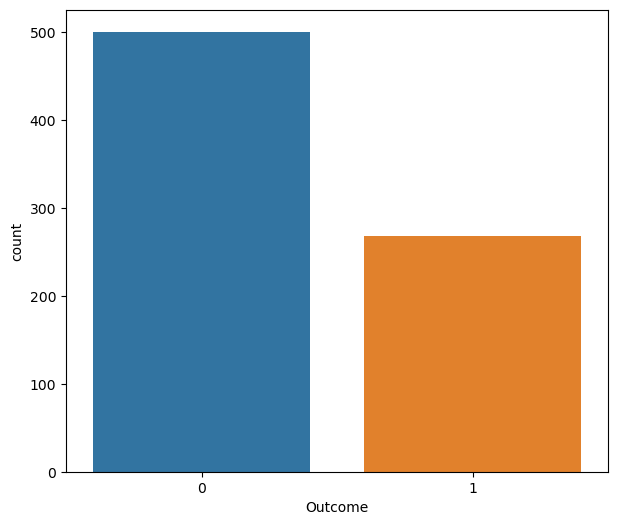

In [6]:
plt.figure(figsize=(7,6))
sns.countplot(data=diabetes,x="Outcome")
#plt.axis([-1,2,0,600])

2)

In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
affected=[]
for col in diabetes.columns[:-1]:
    if diabetes[col].min()==0:
        print(f"{col} minimum is equal to 0")
        affected.append(col)
        med=diabetes[col].median()
        diabetes[col].replace(0,med,inplace=True)


Pregnancies minimum is equal to 0
Glucose minimum is equal to 0
BloodPressure minimum is equal to 0
SkinThickness minimum is equal to 0
Insulin minimum is equal to 0
BMI minimum is equal to 0


In [9]:
print(affected) #These are the columns affected by this step

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


We print the columns that have min value equal to zero except the target variable (Outcome)

In [10]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=diabetes.iloc[:,:-1];X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,3,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [91]:
y=diabetes.iloc[:,-1];y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,train_size=700,random_state=42)

In [15]:
X_train.shape[0]

700

In [16]:
X_test.shape[0]

68

4)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
clf=DecisionTreeClassifier(random_state=42)

In [19]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
DecisionTree_pred=clf.predict(X_test)

In [21]:
DecisionTree_report=classification_report(DecisionTree_pred,y_test)

In [22]:
print(DecisionTree_report)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        45
           1       0.54      0.57      0.55        23

    accuracy                           0.69        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.69      0.69      0.69        68



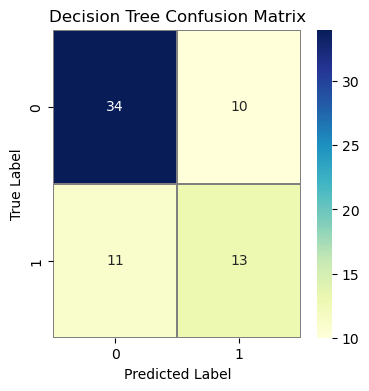

In [23]:
confusionmatrix_Dec=confusion_matrix(y_test,DecisionTree_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confusionmatrix_Dec, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label",rotation=90)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier

In [25]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [26]:
Randomforest_pred=rfc.predict(X_test)

In [27]:
Randomforest_report=classification_report(y_test,Randomforest_pred)
print(Randomforest_report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.73      0.79      0.76        24

    accuracy                           0.82        68
   macro avg       0.81      0.82      0.81        68
weighted avg       0.83      0.82      0.83        68



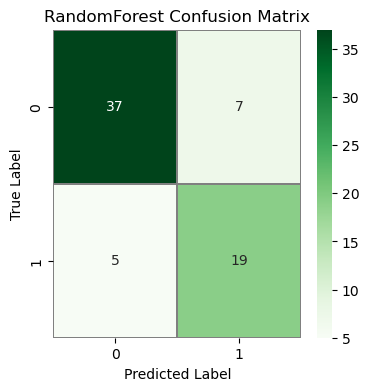

In [28]:
confusionmatrix_Rafo=confusion_matrix(y_test,Randomforest_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confusionmatrix_Rafo, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label",rotation=90)
plt.title("RandomForest Confusion Matrix")
plt.show()

In [29]:
from sklearn.svm import SVC

In [30]:
bgc=BaggingClassifier(estimator=SVC(kernel="linear"),n_estimators=10,random_state=42)

In [31]:
bgc.fit(X_train,y_train)

BaggingClassifier(estimator=SVC(kernel='linear'), random_state=42)

In [32]:
Bagging_predict=bgc.predict(X_test)

In [33]:
Bagging_report=classification_report(y_test,Bagging_predict)
print(Bagging_report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.67      0.67      0.67        24

    accuracy                           0.76        68
   macro avg       0.74      0.74      0.74        68
weighted avg       0.76      0.76      0.76        68



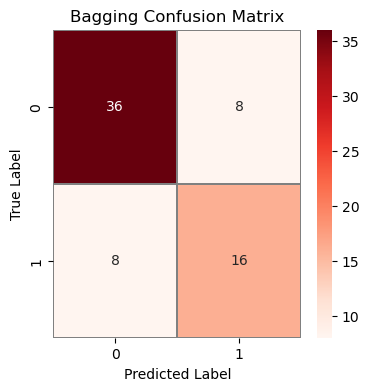

In [34]:
confusionBagging=confusion_matrix(y_test,Bagging_predict)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confusionBagging, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label",rotation=90)
plt.title("Bagging Confusion Matrix")
plt.show()

In [35]:
ada=AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=100, random_state=42,learning_rate=0.25)


In [36]:
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.25,
                   n_estimators=100, random_state=42)

In [37]:
Adaboost_predict=ada.predict(X_test)

In [38]:
Adaboost_report=classification_report(y_test,Adaboost_predict)
print(Adaboost_report)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        44
           1       0.52      0.50      0.51        24

    accuracy                           0.66        68
   macro avg       0.63      0.62      0.63        68
weighted avg       0.66      0.66      0.66        68



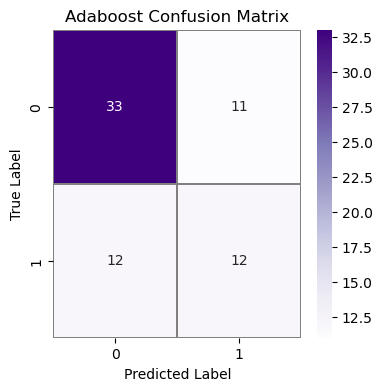

In [39]:
confusionAdaboost=confusion_matrix(y_test,Adaboost_predict)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confusionAdaboost, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label",rotation=90)
plt.title("Adaboost Confusion Matrix")
plt.show()

5)

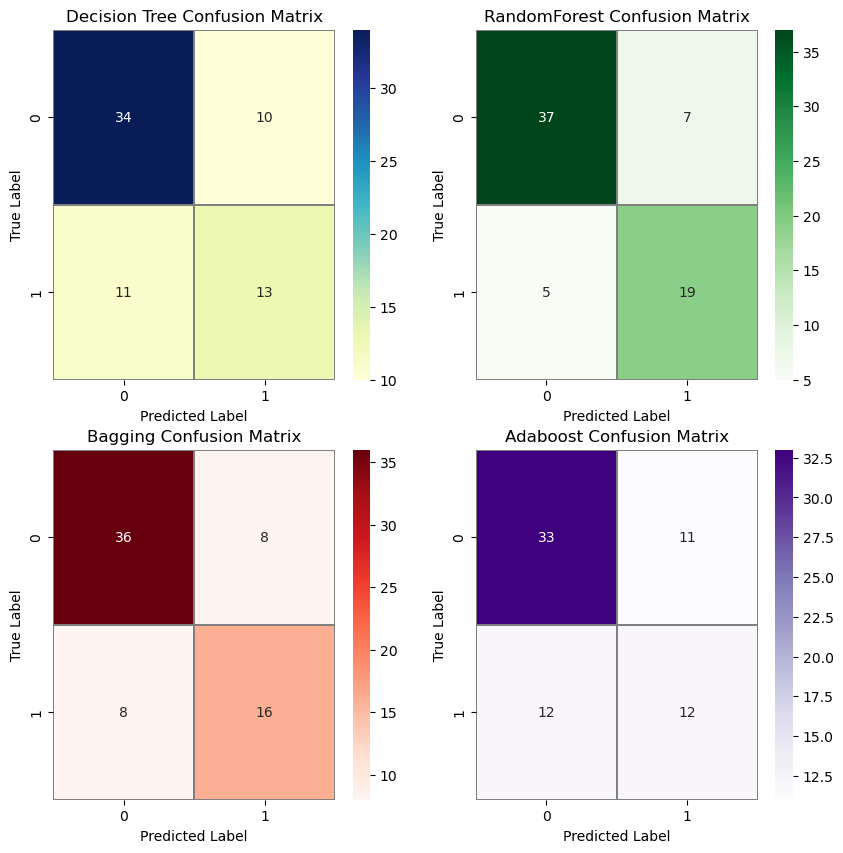

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.heatmap(confusionmatrix_Dec, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label",rotation=90)
plt.title("Decision Tree Confusion Matrix")


plt.subplot(2,2,2)
sns.heatmap(confusionmatrix_Rafo, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label",rotation=90)
plt.title("RandomForest Confusion Matrix")


plt.subplot(2,2,3)
sns.heatmap(confusionBagging, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label",rotation=90)
plt.title("Bagging Confusion Matrix")


plt.subplot(2,2,4)
sns.heatmap(confusionAdaboost, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label",rotation=90)
plt.title("Adaboost Confusion Matrix")
plt.show()
plt.tight_layout()

As we can see from the aggregated confusion matrices the best performance has the Random forest classifier with less false positive and false negatives FP+FN=12 and accuracy equal to 82%. It follows the Bagging classifier with 76%,Decision Tree with 69% and last AdaBoost with 66%.

6)

In [41]:
from sklearn.semi_supervised import SelfTrainingClassifier

In [42]:
self_training=SelfTrainingClassifier(base_estimator=RandomForestClassifier(),threshold=0.99)

In [43]:
rng = np.random.RandomState(42)

In [ ]:
for i in X_train[:200]:
    X

In [46]:
X_200=X_train[:200];X_200

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
294,3,161,50,23,30.5,21.9,0.254,65
466,3,74,52,10,36.0,27.8,0.269,22
298,14,100,78,25,184.0,36.6,0.412,46
711,5,126,78,27,22.0,29.6,0.439,40
512,9,91,68,23,30.5,24.2,0.200,58
...,...,...,...,...,...,...,...,...
452,3,91,68,32,210.0,39.9,0.381,25
624,2,108,64,23,30.5,30.8,0.158,21
255,1,113,64,35,30.5,33.6,0.543,21
181,3,119,64,18,92.0,34.9,0.725,23


In [50]:
X_500=X_train[200:];X_500

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
206,8,196,76,29,280.0,37.5,0.605,57
97,1,71,48,18,76.0,20.4,0.323,22
650,1,91,54,25,100.0,25.2,0.234,23
234,3,74,68,28,45.0,29.7,0.293,23
224,1,100,66,15,56.0,23.6,0.666,26
...,...,...,...,...,...,...,...,...
678,3,121,52,23,30.5,36.0,0.127,25
113,4,76,62,23,30.5,34.0,0.391,25
556,1,97,70,40,30.5,38.1,0.218,30
458,10,148,84,48,237.0,37.6,1.001,51


In [47]:
y_200=y_train[:200];y_200

294    0
466    0
298    1
711    0
512    0
      ..
452    0
624    0
255    1
181    0
218    1
Name: Outcome, Length: 200, dtype: int64

In [56]:
y_500=y_train[200:];y_500

206    1
97     0
650    0
234    0
224    0
      ..
678    1
113    0
556    0
458    1
107    0
Name: Outcome, Length: 500, dtype: int64

In [60]:
y_500[0:500]=-1;y_500 # we set equal to -1 as the unlabed data

206   -1
97    -1
650   -1
234   -1
224   -1
      ..
678   -1
113   -1
556   -1
458   -1
107   -1
Name: Outcome, Length: 500, dtype: int64

Train the supervised model on the labeled data

In [61]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_200,y_200)

RandomForestClassifier(random_state=42)

In [64]:
RandomForest_predict_200=rfc.predict(X_test)

In [66]:
Randomforest_report=classification_report(y_test,RandomForest_predict_200)
print(Randomforest_report)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        44
           1       0.71      0.50      0.59        24

    accuracy                           0.75        68
   macro avg       0.74      0.69      0.70        68
weighted avg       0.74      0.75      0.74        68



Train the semi-supervised model on both labeled and unlabeled data

In [74]:
X_labeled_unlabeled=X_train;X_labeled_unlabeled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
294,3,161,50,23,30.5,21.9,0.254,65
466,3,74,52,10,36.0,27.8,0.269,22
298,14,100,78,25,184.0,36.6,0.412,46
711,5,126,78,27,22.0,29.6,0.439,40
512,9,91,68,23,30.5,24.2,0.200,58
...,...,...,...,...,...,...,...,...
678,3,121,52,23,30.5,36.0,0.127,25
113,4,76,62,23,30.5,34.0,0.391,25
556,1,97,70,40,30.5,38.1,0.218,30
458,10,148,84,48,237.0,37.6,1.001,51


In [93]:
y_labeled_unlabeled=y_train;y_labeled_unlabeled

294    0
466    0
298    1
711    0
512    0
      ..
678    1
113    0
556    0
458    1
107    0
Name: Outcome, Length: 700, dtype: int64

In [94]:
y_labeled_unlabeled[:200]=y_200[:]
y_labeled_unlabeled[200:]=y_500[:]

In [95]:
y_labeled_unlabeled

294    0
466    0
298    1
711    0
512    0
      ..
678   -1
113   -1
556   -1
458   -1
107   -1
Name: Outcome, Length: 700, dtype: int64

In [96]:
self_training.fit(X_labeled_unlabeled,y_labeled_unlabeled)

SelfTrainingClassifier(base_estimator=RandomForestClassifier(), threshold=0.99)

In [97]:
self_training_predict=self_training.predict(X_test)

In [98]:
self_training_report=classification_report(y_test,self_training_predict)
print(self_training_report)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        44
           1       0.76      0.54      0.63        24

    accuracy                           0.78        68
   macro avg       0.77      0.73      0.74        68
weighted avg       0.78      0.78      0.77        68



In [99]:
Randomforest_report=classification_report(y_test,RandomForest_predict_200)
print(Randomforest_report)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        44
           1       0.71      0.50      0.59        24

    accuracy                           0.75        68
   macro avg       0.74      0.69      0.70        68
weighted avg       0.74      0.75      0.74        68



As we can see the semi-supervised model achieves slightly better result compared with the supervised model. The semi-supervised model allows the supervised classifier to learn from unlabeled data by predicting pseudo labels for the unlabeled data and adding them to training set. It is used when we have mostly unlabeled data and it can achieve better results than the supervised methods because the classifier learns from unlabeled data compared with the supervised approach. 